In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 13, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

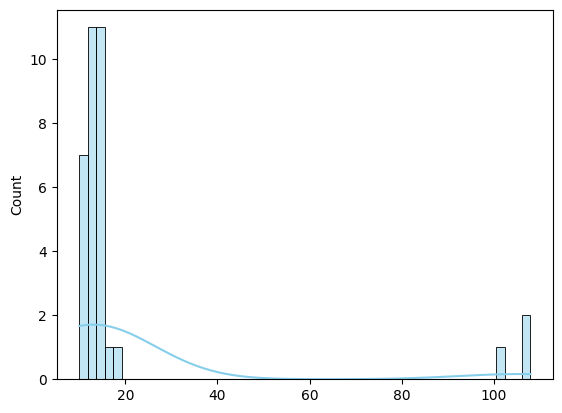

In [27]:
sns.histplot(dataset, kde=True, color="skyblue") #kernel density estimation
plt.show()

In [28]:
mean = np.mean(dataset)
std = np.std(dataset)
print(mean, std)

21.205882352941178 26.362606552111902


In [29]:
outliers = []


for i in dataset:
    z = (i - mean) / std
    if z > (mean + 3 * std) / 100 or z < (mean - 3 * std) / 100:
        outliers.append(i)

outliers

[102, 107, 108]

In [31]:
clean_data = [dataset.remove(i) if i in outliers else i for i in dataset]
clean_data

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 12,
 14,
 17,
 19,
 10,
 13,
 13,
 14,
 12,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

<Axes: >

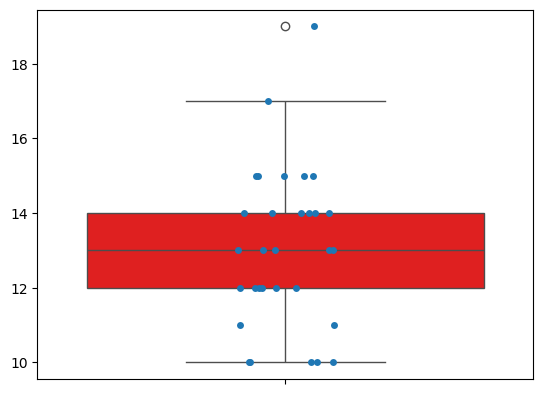

In [34]:
sns.boxplot(data=clean_data, color="red")
sns.stripplot(clean_data)

In [40]:
THRESHOLD = 3
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 13, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]
def detect_outliers(data):
    outliers = []
    mean = np.mean(data)
    std = np.median(data)

    for i in dataset:
        z_score = (i - mean) / std

    if np.abs(z_score) > THRESHOLD:
        outliers.append(i)

    return outliers

outliers = detect_outliers(data=dataset)
print(outliers)

[]


In [51]:
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 13, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]
def outliers_detection(data):
    
    outliers = []
    sorted_data = sorted(data)
    # print(sorted_data)
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    IQR = q3 - q1
    lower_fench = q1 - 1.5 * IQR
    upper_fench = q3 + 1.5 * IQR
    print(upper_fench, lower_fench)

    for i in data:
        if i > upper_fench or i < lower_fench:
            outliers.append(i)

    return outliers

    # print(q1, q2)
    # print(sorted_data)

outliers = outliers_detection(data=dataset)
print(f"The outliers are {outliers}.")

19.5 7.5
The outliers are [102, 107, 108].
